This script calculates the non-green, likely mined area in counties in our [Region of Interest](https://docs.google.com/document/d/10Kd-6qcMn3c0S7YfY2aAZJZ8eJi1Q0oRvd5tea-ykUM/edit) for 1984 to 2015, and saves the output to county_areas.csv. It takes about two days to run.

I also printed all the results to the console so that I wouldn't lose any of them if the script failed, which is why this notebook is so long. 



In [36]:
import ee
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
%matplotlib inline

In [24]:
ee.Initialize()

In [12]:
# from https://www.census.gov/geo/reference/codes/cou.html
# http://www2.census.gov/geo/docs/reference/codes/files/st54_wv_cou.txt
# http://www2.census.gov/geo/docs/reference/codes/files/st21_ky_cou.txt
# http://www2.census.gov/geo/docs/reference/codes/files/st47_tn_cou.txt
# http://www2.census.gov/geo/docs/reference/codes/files/st51_va_cou.txt

va_counties_raw = '''VA,51,001,Accomack County,H1
VA,51,003,Albemarle County,H1
VA,51,005,Alleghany County,H1
VA,51,007,Amelia County,H1
VA,51,009,Amherst County,H1
VA,51,011,Appomattox County,H1
VA,51,013,Arlington County,H1
VA,51,015,Augusta County,H1
VA,51,017,Bath County,H1
VA,51,019,Bedford County,H1
VA,51,021,Bland County,H1
VA,51,023,Botetourt County,H1
VA,51,025,Brunswick County,H1
VA,51,027,Buchanan County,H1
VA,51,029,Buckingham County,H1
VA,51,031,Campbell County,H1
VA,51,033,Caroline County,H1
VA,51,035,Carroll County,H1
VA,51,036,Charles City County,H1
VA,51,037,Charlotte County,H1
VA,51,041,Chesterfield County,H1
VA,51,043,Clarke County,H1
VA,51,045,Craig County,H1
VA,51,047,Culpeper County,H1
VA,51,049,Cumberland County,H1
VA,51,051,Dickenson County,H1
VA,51,053,Dinwiddie County,H1
VA,51,057,Essex County,H1
VA,51,059,Fairfax County,H1
VA,51,061,Fauquier County,H1
VA,51,063,Floyd County,H1
VA,51,065,Fluvanna County,H1
VA,51,067,Franklin County,H1
VA,51,069,Frederick County,H1
VA,51,071,Giles County,H1
VA,51,073,Gloucester County,H1
VA,51,075,Goochland County,H1
VA,51,077,Grayson County,H1
VA,51,079,Greene County,H1
VA,51,081,Greensville County,H1
VA,51,083,Halifax County,H1
VA,51,085,Hanover County,H1
VA,51,087,Henrico County,H1
VA,51,089,Henry County,H1
VA,51,091,Highland County,H1
VA,51,093,Isle of Wight County,H1
VA,51,095,James City County,H1
VA,51,097,King and Queen County,H1
VA,51,099,King George County,H1
VA,51,101,King William County,H1
VA,51,103,Lancaster County,H1
VA,51,105,Lee County,H1
VA,51,107,Loudoun County,H1
VA,51,109,Louisa County,H1
VA,51,111,Lunenburg County,H1
VA,51,113,Madison County,H1
VA,51,115,Mathews County,H1
VA,51,117,Mecklenburg County,H1
VA,51,119,Middlesex County,H1
VA,51,121,Montgomery County,H1
VA,51,125,Nelson County,H1
VA,51,127,New Kent County,H1
VA,51,131,Northampton County,H1
VA,51,133,Northumberland County,H1
VA,51,135,Nottoway County,H1
VA,51,137,Orange County,H1
VA,51,139,Page County,H1
VA,51,141,Patrick County,H1
VA,51,143,Pittsylvania County,H1
VA,51,145,Powhatan County,H1
VA,51,147,Prince Edward County,H1
VA,51,149,Prince George County,H1
VA,51,153,Prince William County,H1
VA,51,155,Pulaski County,H1
VA,51,157,Rappahannock County,H1
VA,51,159,Richmond County,H1
VA,51,161,Roanoke County,H1
VA,51,163,Rockbridge County,H1
VA,51,165,Rockingham County,H1
VA,51,167,Russell County,H1
VA,51,169,Scott County,H1
VA,51,171,Shenandoah County,H1
VA,51,173,Smyth County,H1
VA,51,175,Southampton County,H1
VA,51,177,Spotsylvania County,H1
VA,51,179,Stafford County,H1
VA,51,181,Surry County,H1
VA,51,183,Sussex County,H1
VA,51,185,Tazewell County,H1
VA,51,187,Warren County,H1
VA,51,191,Washington County,H1
VA,51,193,Westmoreland County,H1
VA,51,195,Wise County,H1
VA,51,197,Wythe County,H1
VA,51,199,York County,H1
VA,51,510,Alexandria city,C7
VA,51,515,Bedford city,C7
VA,51,520,Bristol city,C7
VA,51,530,Buena Vista city,C7
VA,51,540,Charlottesville city,C7
VA,51,550,Chesapeake city,C7
VA,51,570,Colonial Heights city,C7
VA,51,580,Covington city,C7
VA,51,590,Danville city,C7
VA,51,595,Emporia city,C7
VA,51,600,Fairfax city,C7
VA,51,610,Falls Church city,C7
VA,51,620,Franklin city,C7
VA,51,630,Fredericksburg city,C7
VA,51,640,Galax city,C7
VA,51,650,Hampton city,C7
VA,51,660,Harrisonburg city,C7
VA,51,670,Hopewell city,C7
VA,51,678,Lexington city,C7
VA,51,680,Lynchburg city,C7
VA,51,683,Manassas city,C7
VA,51,685,Manassas Park city,C7
VA,51,690,Martinsville city,C7
VA,51,700,Newport News city,C7
VA,51,710,Norfolk city,C7
VA,51,720,Norton city,C7
VA,51,730,Petersburg city,C7
VA,51,735,Poquoson city,C7
VA,51,740,Portsmouth city,C7
VA,51,750,Radford city,C7
VA,51,760,Richmond city,C7
VA,51,770,Roanoke city,C7
VA,51,775,Salem city,C7
VA,51,790,Staunton city,C7
VA,51,800,Suffolk city,C7
VA,51,810,Virginia Beach city,C7
VA,51,820,Waynesboro city,C7
VA,51,830,Williamsburg city,C7
VA,51,840,Winchester city,C7'''.split("\n")

wv_counties_raw = '''WV,54,001,Barbour County,H1
WV,54,003,Berkeley County,H1
WV,54,005,Boone County,H1
WV,54,007,Braxton County,H1
WV,54,009,Brooke County,H1
WV,54,011,Cabell County,H1
WV,54,013,Calhoun County,H1
WV,54,015,Clay County,H1
WV,54,017,Doddridge County,H1
WV,54,019,Fayette County,H1
WV,54,021,Gilmer County,H1
WV,54,023,Grant County,H1
WV,54,025,Greenbrier County,H1
WV,54,027,Hampshire County,H1
WV,54,029,Hancock County,H1
WV,54,031,Hardy County,H1
WV,54,033,Harrison County,H1
WV,54,035,Jackson County,H1
WV,54,037,Jefferson County,H1
WV,54,039,Kanawha County,H1
WV,54,041,Lewis County,H1
WV,54,043,Lincoln County,H1
WV,54,045,Logan County,H1
WV,54,047,McDowell County,H1
WV,54,049,Marion County,H1
WV,54,051,Marshall County,H1
WV,54,053,Mason County,H1
WV,54,055,Mercer County,H1
WV,54,057,Mineral County,H1
WV,54,059,Mingo County,H1
WV,54,061,Monongalia County,H1
WV,54,063,Monroe County,H1
WV,54,065,Morgan County,H1
WV,54,067,Nicholas County,H1
WV,54,069,Ohio County,H1
WV,54,071,Pendleton County,H1
WV,54,073,Pleasants County,H1
WV,54,075,Pocahontas County,H1
WV,54,077,Preston County,H1
WV,54,079,Putnam County,H1
WV,54,081,Raleigh County,H1
WV,54,083,Randolph County,H1
WV,54,085,Ritchie County,H1
WV,54,087,Roane County,H1
WV,54,089,Summers County,H1
WV,54,091,Taylor County,H1
WV,54,093,Tucker County,H1
WV,54,095,Tyler County,H1
WV,54,097,Upshur County,H1
WV,54,099,Wayne County,H1
WV,54,101,Webster County,H1
WV,54,103,Wetzel County,H1
WV,54,105,Wirt County,H1
WV,54,107,Wood County,H1
WV,54,109,Wyoming County,H1'''.split("\n")

ky_counties_raw = '''KY,21,001,Adair County,H1
KY,21,003,Allen County,H1
KY,21,005,Anderson County,H1
KY,21,007,Ballard County,H1
KY,21,009,Barren County,H1
KY,21,011,Bath County,H1
KY,21,013,Bell County,H1
KY,21,015,Boone County,H1
KY,21,017,Bourbon County,H1
KY,21,019,Boyd County,H1
KY,21,021,Boyle County,H1
KY,21,023,Bracken County,H1
KY,21,025,Breathitt County,H1
KY,21,027,Breckinridge County,H1
KY,21,029,Bullitt County,H1
KY,21,031,Butler County,H1
KY,21,033,Caldwell County,H1
KY,21,035,Calloway County,H1
KY,21,037,Campbell County,H1
KY,21,039,Carlisle County,H1
KY,21,041,Carroll County,H1
KY,21,043,Carter County,H1
KY,21,045,Casey County,H1
KY,21,047,Christian County,H1
KY,21,049,Clark County,H1
KY,21,051,Clay County,H1
KY,21,053,Clinton County,H1
KY,21,055,Crittenden County,H1
KY,21,057,Cumberland County,H1
KY,21,059,Daviess County,H1
KY,21,061,Edmonson County,H1
KY,21,063,Elliott County,H1
KY,21,065,Estill County,H1
KY,21,067,Fayette County,H6
KY,21,069,Fleming County,H1
KY,21,071,Floyd County,H1
KY,21,073,Franklin County,H1
KY,21,075,Fulton County,H1
KY,21,077,Gallatin County,H1
KY,21,079,Garrard County,H1
KY,21,081,Grant County,H1
KY,21,083,Graves County,H1
KY,21,085,Grayson County,H1
KY,21,087,Green County,H1
KY,21,089,Greenup County,H1
KY,21,091,Hancock County,H1
KY,21,093,Hardin County,H1
KY,21,095,Harlan County,H1
KY,21,097,Harrison County,H1
KY,21,099,Hart County,H1
KY,21,101,Henderson County,H1
KY,21,103,Henry County,H1
KY,21,105,Hickman County,H1
KY,21,107,Hopkins County,H1
KY,21,109,Jackson County,H1
KY,21,111,Jefferson County,H1
KY,21,113,Jessamine County,H1
KY,21,115,Johnson County,H1
KY,21,117,Kenton County,H1
KY,21,119,Knott County,H1
KY,21,121,Knox County,H1
KY,21,123,Larue County,H1
KY,21,125,Laurel County,H1
KY,21,127,Lawrence County,H1
KY,21,129,Lee County,H1
KY,21,131,Leslie County,H1
KY,21,133,Letcher County,H1
KY,21,135,Lewis County,H1
KY,21,137,Lincoln County,H1
KY,21,139,Livingston County,H1
KY,21,141,Logan County,H1
KY,21,143,Lyon County,H1
KY,21,145,McCracken County,H1
KY,21,147,McCreary County,H1
KY,21,149,McLean County,H1
KY,21,151,Madison County,H1
KY,21,153,Magoffin County,H1
KY,21,155,Marion County,H1
KY,21,157,Marshall County,H1
KY,21,159,Martin County,H1
KY,21,161,Mason County,H1
KY,21,163,Meade County,H1
KY,21,165,Menifee County,H1
KY,21,167,Mercer County,H1
KY,21,169,Metcalfe County,H1
KY,21,171,Monroe County,H1
KY,21,173,Montgomery County,H1
KY,21,175,Morgan County,H1
KY,21,177,Muhlenberg County,H1
KY,21,179,Nelson County,H1
KY,21,181,Nicholas County,H1
KY,21,183,Ohio County,H1
KY,21,185,Oldham County,H1
KY,21,187,Owen County,H1
KY,21,189,Owsley County,H1
KY,21,191,Pendleton County,H1
KY,21,193,Perry County,H1
KY,21,195,Pike County,H1
KY,21,197,Powell County,H1
KY,21,199,Pulaski County,H1
KY,21,201,Robertson County,H1
KY,21,203,Rockcastle County,H1
KY,21,205,Rowan County,H1
KY,21,207,Russell County,H1
KY,21,209,Scott County,H1
KY,21,211,Shelby County,H1
KY,21,213,Simpson County,H1
KY,21,215,Spencer County,H1
KY,21,217,Taylor County,H1
KY,21,219,Todd County,H1
KY,21,221,Trigg County,H1
KY,21,223,Trimble County,H1
KY,21,225,Union County,H1
KY,21,227,Warren County,H1
KY,21,229,Washington County,H1
KY,21,231,Wayne County,H1
KY,21,233,Webster County,H1
KY,21,235,Whitley County,H1
KY,21,237,Wolfe County,H1
KY,21,239,Woodford County,H1'''.split("\n")


tn_counties_raw = '''TN,47,001,Anderson County,H1
TN,47,003,Bedford County,H1
TN,47,005,Benton County,H1
TN,47,007,Bledsoe County,H1
TN,47,009,Blount County,H1
TN,47,011,Bradley County,H1
TN,47,013,Campbell County,H1
TN,47,015,Cannon County,H1
TN,47,017,Carroll County,H1
TN,47,019,Carter County,H1
TN,47,021,Cheatham County,H1
TN,47,023,Chester County,H1
TN,47,025,Claiborne County,H1
TN,47,027,Clay County,H1
TN,47,029,Cocke County,H1
TN,47,031,Coffee County,H1
TN,47,033,Crockett County,H1
TN,47,035,Cumberland County,H1
TN,47,037,Davidson County,H6
TN,47,039,Decatur County,H1
TN,47,041,DeKalb County,H1
TN,47,043,Dickson County,H1
TN,47,045,Dyer County,H1
TN,47,047,Fayette County,H1
TN,47,049,Fentress County,H1
TN,47,051,Franklin County,H1
TN,47,053,Gibson County,H1
TN,47,055,Giles County,H1
TN,47,057,Grainger County,H1
TN,47,059,Greene County,H1
TN,47,061,Grundy County,H1
TN,47,063,Hamblen County,H1
TN,47,065,Hamilton County,H1
TN,47,067,Hancock County,H1
TN,47,069,Hardeman County,H1
TN,47,071,Hardin County,H1
TN,47,073,Hawkins County,H1
TN,47,075,Haywood County,H1
TN,47,077,Henderson County,H1
TN,47,079,Henry County,H1
TN,47,081,Hickman County,H1
TN,47,083,Houston County,H1
TN,47,085,Humphreys County,H1
TN,47,087,Jackson County,H1
TN,47,089,Jefferson County,H1
TN,47,091,Johnson County,H1
TN,47,093,Knox County,H1
TN,47,095,Lake County,H1
TN,47,097,Lauderdale County,H1
TN,47,099,Lawrence County,H1
TN,47,101,Lewis County,H1
TN,47,103,Lincoln County,H1
TN,47,105,Loudon County,H1
TN,47,107,McMinn County,H1
TN,47,109,McNairy County,H1
TN,47,111,Macon County,H1
TN,47,113,Madison County,H1
TN,47,115,Marion County,H1
TN,47,117,Marshall County,H1
TN,47,119,Maury County,H1
TN,47,121,Meigs County,H1
TN,47,123,Monroe County,H1
TN,47,125,Montgomery County,H1
TN,47,127,Moore County,H6
TN,47,129,Morgan County,H1
TN,47,131,Obion County,H1
TN,47,133,Overton County,H1
TN,47,135,Perry County,H1
TN,47,137,Pickett County,H1
TN,47,139,Polk County,H1
TN,47,141,Putnam County,H1
TN,47,143,Rhea County,H1
TN,47,145,Roane County,H1
TN,47,147,Robertson County,H1
TN,47,149,Rutherford County,H1
TN,47,151,Scott County,H1
TN,47,153,Sequatchie County,H1
TN,47,155,Sevier County,H1
TN,47,157,Shelby County,H1
TN,47,159,Smith County,H1
TN,47,161,Stewart County,H1
TN,47,163,Sullivan County,H1
TN,47,165,Sumner County,H1
TN,47,167,Tipton County,H1
TN,47,169,Trousdale County,H6
TN,47,171,Unicoi County,H1
TN,47,173,Union County,H1
TN,47,175,Van Buren County,H1
TN,47,177,Warren County,H1
TN,47,179,Washington County,H1
TN,47,181,Wayne County,H1
TN,47,183,Weakley County,H1
TN,47,185,White County,H1
TN,47,187,Williamson County,H1
TN,47,189,Wilson County,H1'''.split("\n")




In [13]:
fips_codes_in_roi = [21013,21019,21025,21043,21051,21053,21063,21065,21071,21089,21095,21109,
                     21115,21119,21121,21125,21127,21129,21131,21133,21135,21147,21153,21159,
                     21165,21175,21189,21193,21195,21197,21199,21203,21205,21231,21235,21237,
                     47001,47013,47025,47035,47049,47129,47133,47137,47141,47145,47151,51027,
                     51051,51105,51167,51169,51185,51195,51720 ,54005,54011,54015,54019,54025,
                     54039,54043,54045,54047,54053,54055,54059,54067,54075,54081,54089,54099,54101,54109]

counties_in_roi = {}

for c in (tn_counties_raw + wv_counties_raw + va_counties_raw + ky_counties_raw):
    c = c.split(",")
    fips_code = int(c[1]+c[2]) 
    if fips_code in fips_codes_in_roi:
        counties_in_roi[c[3].replace(" County", " "+c[0])] = fips_code
    

In [14]:
# fips_wv = [54005,54011,54015,54019,54025,54039,54043,
#            54045,54047,54053,54055,54059,54067,54075,
#            54081,54089,54099,54101,54109]

# wv_counties = {
#     'Boone':54005,
#     'Logan':54045,
#    'Kanawha':54039,
#     'McDowell':54047,
#     'Lincoln': 54043
# }

NDVI_Threshold = 0.51;

mask_input_60m_2015 = ee.Image('users/jerrilyn/2015mask-PM-fullstudy-area');
# Get the link here: https:#drive.google.com/file/d/0B_MArPTqurHudFp6STU4ZzJHRmc/view

counties = ee.FeatureCollection('ft:1S4EB6319wWW2sWQDPhDvmSBIVrD3iEmCLYB7nMM');


In [15]:


'''--------------------------------- IMAGE PROCESSING ---------------------------------'''
def getMTR_area(fips):
    the_county = counties.filterMetadata('FIPS', 'equals', fips);
    
    MTR_area = [[],[]];

    for year in range(1984,2016): # Years of interest for the study

        # Determine what imagery dataset to use, based off year loop; and what threshold to use
        if year <= 2011:
            imagery = ee.ImageCollection("LANDSAT/LT5_L1T_ANNUAL_GREENEST_TOA");
            NDVIbands = 43;

        elif year == 2012:
            imagery = ee.ImageCollection("LANDSAT/LE7_L1T_ANNUAL_GREENEST_TOA");
            NDVIbands = 43;

        elif year >= 2013:
            imagery = ee.ImageCollection("LANDSAT/LC8_L1T_ANNUAL_GREENEST_TOA");
            NDVIbands = 54; # Because different bands are needed for LS8

        # Select specific year for analysis
        yearImg = ee.Image(imagery.filterDate(str(year)+"-01-01", str(year)+"-12-31").first()).clip(the_county);

        # Calculate NDVI (using normalizedDifference function; select correct bands per sensor)
        if NDVIbands == 54:
            NDVI = yearImg.normalizedDifference(["B5","B4"]).clip(the_county);
        else:
            NDVI = yearImg.normalizedDifference(["B4","B3"]).clip(the_county);


        # Create a mask of areas that ARE NOT mines (value of 1 to locations where NDVI is <= threshold)
        lowNDVI = NDVI.where(NDVI.lte(NDVI_Threshold),1).where(NDVI.gt(NDVI_Threshold),0);

        # Create binary image containing the intersection between the LowNDVI and anywhere the inverted mask is 1
        MTR = lowNDVI.And(mask_input_60m_2015.eq(0));

        # Erode/dilate MTR sites to remove outliers (pixel clean-up)
        MTR_eroded_dialated_dialated_eroded = MTR.reduceNeighborhood(ee.Reducer.max(), ee.Kernel.euclidean(30, 'meters'))\
        .reduceNeighborhood(ee.Reducer.min(), ee.Kernel.euclidean(60, 'meters'))\
        .reduceNeighborhood(ee.Reducer.max(), ee.Kernel.euclidean(30, 'meters'));

        MTR_masked = MTR_eroded_dialated_dialated_eroded.updateMask(MTR_eroded_dialated_dialated_eroded);


        #  Get a pixel area image, which will apply to any scale you provide
        Area = ee.Image.pixelArea();

        # The area calculation, which currently burns out the server
        areaAll = MTR_masked.multiply(Area).reduceRegion(reducer=ee.Reducer.sum(),geometry=the_county, 
                                                          scale= 30,crs= 'EPSG:3857',maxPixels= 1e9)
        areaKmSq = ee.Number(areaAll.get(MTR_masked.bandNames().getInfo()[0])).divide(1000*1000);


        # Add these areas and their corresponding year to 2D array
        MTR_area[0].append(year);
        MTR_area[1].append(areaKmSq);

    return MTR_area

In [16]:
def get_area_list(MTR_area):
    county_areas = []
    for i in range(len(MTR_area[1])):
        print MTR_area[0][i],"\t",
        try:
            the_area = MTR_area[1][i].getInfo()
            county_areas.append(the_area)
        except:
            time.sleep(20)
            the_area = MTR_area[1][i].getInfo()
            county_areas.append(the_area)
        print the_area
        time.sleep(15)
    return county_areas

In [ ]:
county_areas = {}


In [18]:
for county in counties_in_roi:
    if county not in county_areas:
        print county
        fips = counties_in_roi[county]
        MTR_area = getMTR_area(fips)
        area_list = get_area_list(MTR_area)
        county_areas[county] = area_list

Overton TN
1984 	10.4720279355
1985 	6.11560031964
1986 	1.61974591846
1987 	10.8674139453
1988 	1.40174560138
1989 	1.59293971088
1990 	2.43683645361
1991 	9.09310187878
1992 	3.05370806317
1993 	3.25001392902
1994 	1.556442125
1995 	2.05065550958
1996 	4.2388233728
1997 	2.38428460754
1998 	1.59052536182
1999 	2.65974545978
2000 	2.25917569415
2001 	2.05117426373
2002 	9.51867058319
2003 	2.46042851056
2004 	2.02896183661
2005 	2.49260439484
2006 	3.04375773993
2007 	4.83848429156
2008 	3.97958510675
2009 	4.10179179565
2010 	3.71089343402
2011 	4.59218602319
2012 	3.67396792468
2013 	2.28137177478
2014 	1.80504072876
2015 	2.36718432568
Pickett TN
1984 	2.76288563257
1985 	2.21983387402
1986 	1.43320282123
1987 	2.21135549054
1988 	1.42845162317
1989 	1.51480668524
1990 	1.5213476153
1991 	7.12514741321
1992 	1.55714219275
1993 	1.53686071704
1994 	1.47843517749
1995 	1.5224627876
1996 	1.75884269757
1997 	1.73844264606
1998 	1.4088832381
1999 	1.7113575976
2000 	1.49631196979
2001 

EEException: An internal server error has occurred.

In [22]:
for c in county_areas:
    print c, len(county_areas[c])

Overton TN 32
Pickett TN 32
Buchanan VA 32
Rowan KY 32
McDowell WV 32
Wyoming WV 32
Fentress TN 32
Knox KY 32
Lincoln WV 32
Cabell WV 32
Logan WV 32
Powell KY 32
Knott KY 32
Kanawha WV 32
Roane TN 32
Clay KY 32
Anderson TN 32
Carter KY 32
Scott TN 32
Clinton KY 32
Scott VA 32
Mingo WV 32
Lee VA 32
Mercer WV 32
Tazewell VA 32
Morgan TN 32
Breathitt KY 32
Bell KY 32
Magoffin KY 32
Estill KY 32
Lawrence KY 32
Nicholas WV 32
Putnam TN 32
Dickenson VA 32
Jackson KY 32
Laurel KY 32
Clay WV 32
Martin KY 32
Lewis KY 32
Campbell TN 32
Boone WV 32
Harlan KY 32
Pike KY 32
Wayne WV 32
Morgan KY 32
Whitley KY 32
Letcher KY 32
Boyd KY 32
Wayne KY 32
Greenup KY 32
Elliott KY 32
Pulaski KY 32


In [25]:
for county in counties_in_roi:
    if county not in county_areas:
        print county
        fips = counties_in_roi[county]
        MTR_area = getMTR_area(fips)
        area_list = get_area_list(MTR_area)
        county_areas[county] = area_list

Mason WV
1984 	7.58925812659
1985 	3.17925819592
1986 	3.48037327179
1987 	4.3938437124
1988 	6.89831236047
1989 	6.70484676013
1990 	5.8859962431
1991 	9.10480830475
1992 	4.79388126508
1993 	4.56467802722
1994 	4.66711345386
1995 	4.4048411062
1996 	3.8202566319
1997 	3.80272194983
1998 	5.19577669318
1999 	4.98861906647
2000 	5.71393012329
2001 	4.19884680664
2002 	8.04476594019
2003 	4.07712822614
2004 	3.56611739844
2005 	5.18085575421
2006 	4.22226793066
2007 	4.78045291724
2008 	3.65556262665
2009 	7.7129442948
2010 	4.65306979071
2011 	3.77201671765
2012 	4.95619750098
2013 	3.46160187531
2014 	3.3867007868
2015 	3.58519833563
Cumberland TN
1984 	15.5033844893
1985 	13.7264969254
1986 	8.68274235846
1987 	97.3381599258
1988 	4.56881636292
1989 	10.6593573647
1990 	8.55102220898
1991 	60.752919013
1992 	8.77338648889
1993 	9.50700665228
1994 	4.50144199414
1995 	5.3356136734
1996 	10.7383786978
1997 	8.33365887744
1998 	6.76131578571
1999 	10.3381304342
2000 	8.90015199268
2001 

EEException: User memory limit exceeded.

In [49]:
for county in counties_in_roi:
    if county not in county_areas:
        print county
        try:
            fips = counties_in_roi[county]
            MTR_area = getMTR_area(fips)
            area_list = get_area_list(MTR_area)
            county_areas[county] = area_list
        except:
            print "error for ",county

Leslie KY
1984 	14.1728179329
1985 	98.9070196564
1986 	7.78160566071
1987 	7.37064471301
1988 	8.66424946539
1989 	38.5224582639
1990 	6.48397520966
1991 	6.37329065619
1992 	9.52620609662
1993 	6.54163457513
1994 	6.63164271082
1995 	6.47985769916
1996 	7.91486322418
1997 	9.49620167194
1998 	14.189321587
1999 	14.345648655
2000 	12.2517521702
2001 	9.10277606262
2002 	15.2262528104
2003 	8.67399301788
2004 	10.5869071764
2005 	13.7879183897
2006 	12.2205920279
2007 	15.9081983073
2008 	16.5791638137
2009 	13.9229472675
2010 	15.6382292849
2011 	14.8447951479
2012 	15.8939158176
2013 	13.2432421114
2014 	8.96036615338
2015 	7.81300711786
Claiborne TN
1984 	10.3425260529
1985 	163.466956892
1986 	5.09812958569
1987 	5.907537414
1988 	5.48082802771
1989 	16.484793421
1990 	5.43399516815
1991 	4.44925782971
1992 	5.25083366443
1993 	5.91491843304
1994 	5.0002078316
1995 	6.82398565204
1996 	7.17482384161
1997 	6.53051082043
1998 	10.1419850531
1999 	6.32759774982
2000 	6.86590941296
200

In [50]:
for county in counties_in_roi:
    if county not in county_areas:
        print county
        try:
            fips = counties_in_roi[county]
            MTR_area = getMTR_area(fips)
            area_list = get_area_list(MTR_area)
            county_areas[county] = area_list
        except:
            print "error for ",county

Floyd KY
1984 	8.39004240265
1985 	8.90757783234
1986 	9.18580302747
1987 	10.2934205595
1988 	12.078272759
1989 	12.7239864572
1990 	11.6418215319
1991 	11.6494084359
1992 	9.93056424249
1993 	9.83662411823
1994 	10.253650006
1995 	9.83596119427
1996 	8.55336425555
1997 	9.31697433728
1998 	7.38864029199
1999 	11.3291990635
2000 	5.78603073199
2001 	3.56568490765
2002 	4.70236480157
2003 	2.44474774207
2004 	4.17721898431
2005 	6.31181590979
2006 	5.65592207733
2007 	11.2834666869
2008 	13.5643977434
2009 	12.6200209185
2010 	10.8661543764
2011 	9.57733449835
2012 	11.5762316987
2013 	7.81196757593
2014 	7.15846294476
2015 	6.02972456061


In [51]:
c_ordered = []
for c in counties_in_roi:
    n = c.split(" ")
    c_ordered.append({'name':n[0],'state':n[-1]})

In [52]:
c_ordered = sorted(c_ordered, key=lambda k: k['name']) 
c_ordered = sorted(c_ordered, key=lambda k: k['state']) 

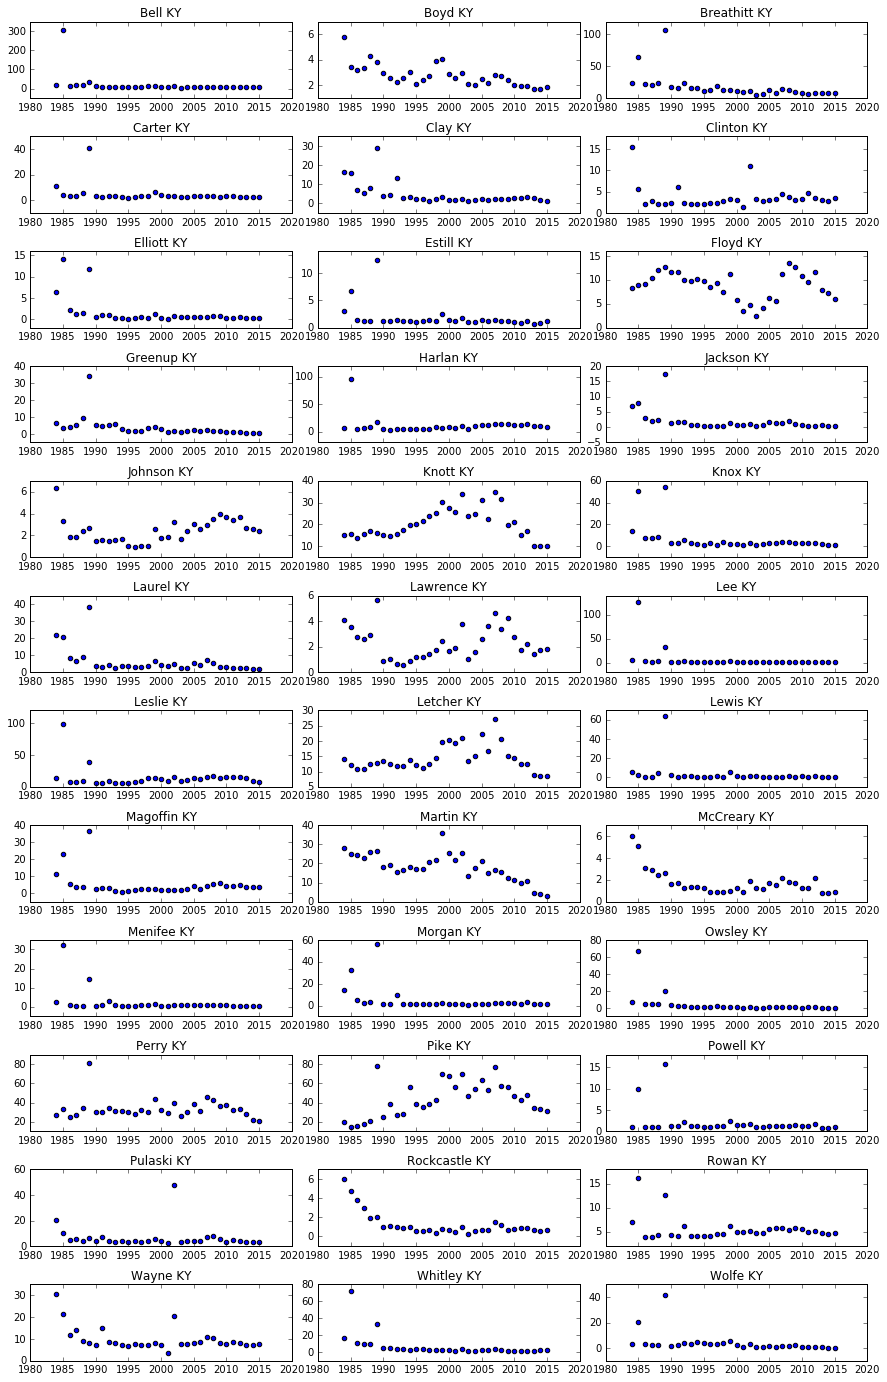

In [64]:
plt.rcParams["figure.figsize"] = [15,24]
fig = plt.figure()

ky = [c['name']+" "+c['state'] for c in c_ordered if c['state'] == 'KY']
gs = gridspec.GridSpec(len(ky)/3, 3 , wspace=0.1, hspace=0.50)

for g,c in zip(gs,ky):
    ax = plt.subplot(g)
    x = [i for i in range(1984,2016)]
    y = county_areas[c]
    ax.scatter(x,y)
    ax.set_title(c)
    ax.yaxis.major.locator.set_params(nbins=5)
    ax.yaxis.major.locator.set_params(nbins=5)
plt.show()



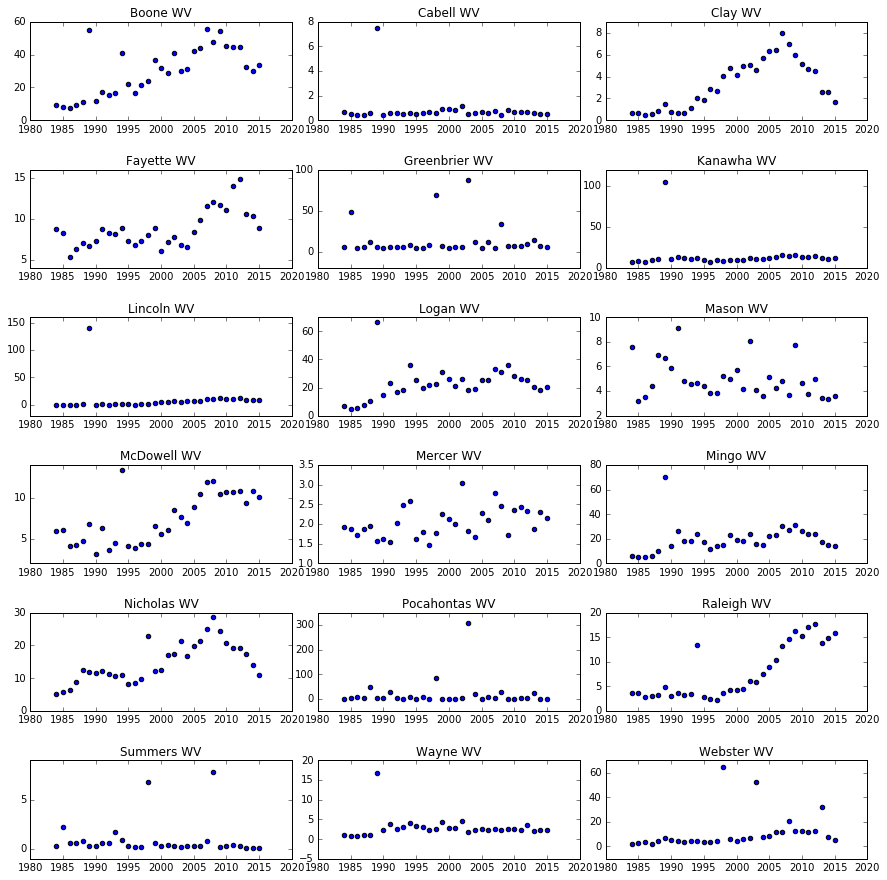

In [69]:
plt.rcParams["figure.figsize"] = [15,15]
fig = plt.figure()

ky = [c['name']+" "+c['state'] for c in c_ordered if c['state'] == 'WV']
gs = gridspec.GridSpec(len(ky)/3, 3 , wspace=0.1, hspace=0.50)

for g,c in zip(gs,ky):
    ax = plt.subplot(g)
    x = [i for i in range(1984,2016)]
    y = county_areas[c]
    ax.scatter(x,y)
    ax.set_title(c)
    ax.yaxis.major.locator.set_params(nbins=5)
    ax.yaxis.major.locator.set_params(nbins=5)
plt.show()


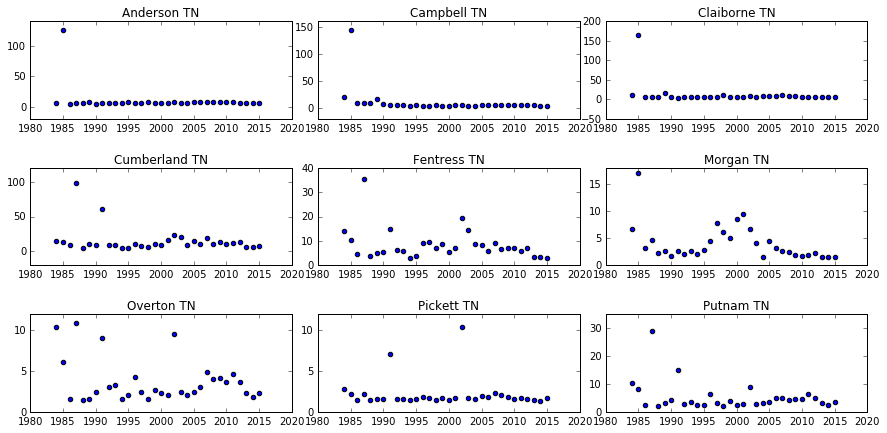

In [68]:
plt.rcParams["figure.figsize"] = [15,7]
fig = plt.figure()

ky = [c['name']+" "+c['state'] for c in c_ordered if c['state'] == 'TN']
gs = gridspec.GridSpec(len(ky)/3, 3 , wspace=0.1, hspace=0.50)

for g,c in zip(gs,ky):
    ax = plt.subplot(g)
    x = [i for i in range(1984,2016)]
    y = county_areas[c]
    ax.scatter(x,y)
    ax.set_title(c)
    ax.yaxis.major.locator.set_params(nbins=5)
    ax.yaxis.major.locator.set_params(nbins=5)
plt.show()


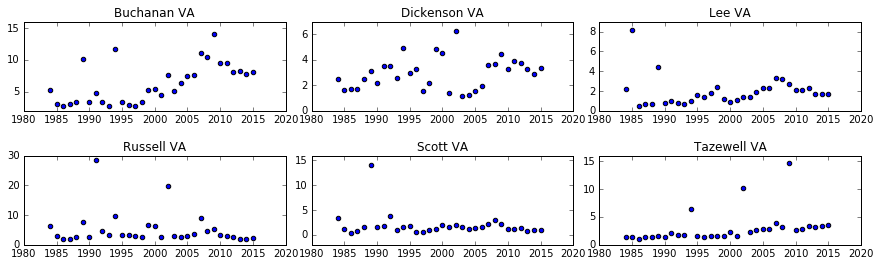

In [72]:
plt.rcParams["figure.figsize"] = [15,4]
fig = plt.figure()

ky = [c['name']+" "+c['state'] for c in c_ordered if c['state'] == 'VA']
gs = gridspec.GridSpec(len(ky)/3, 3 , wspace=0.1, hspace=0.50)

for g,c in zip(gs,ky):
    ax = plt.subplot(g)
    x = [i for i in range(1984,2016)]
    y = county_areas[c]
    ax.scatter(x,y)
    ax.set_title(c)
    ax.yaxis.major.locator.set_params(nbins=5)
    ax.yaxis.major.locator.set_params(nbins=5)
plt.show()

In [73]:
import cPickle as pickle
with open("counties.obj", 'wb') as fp:
    pickle.dump(county_areas, fp)


# Now get rid of Noisy Years
85, 89, 94, 07, 12






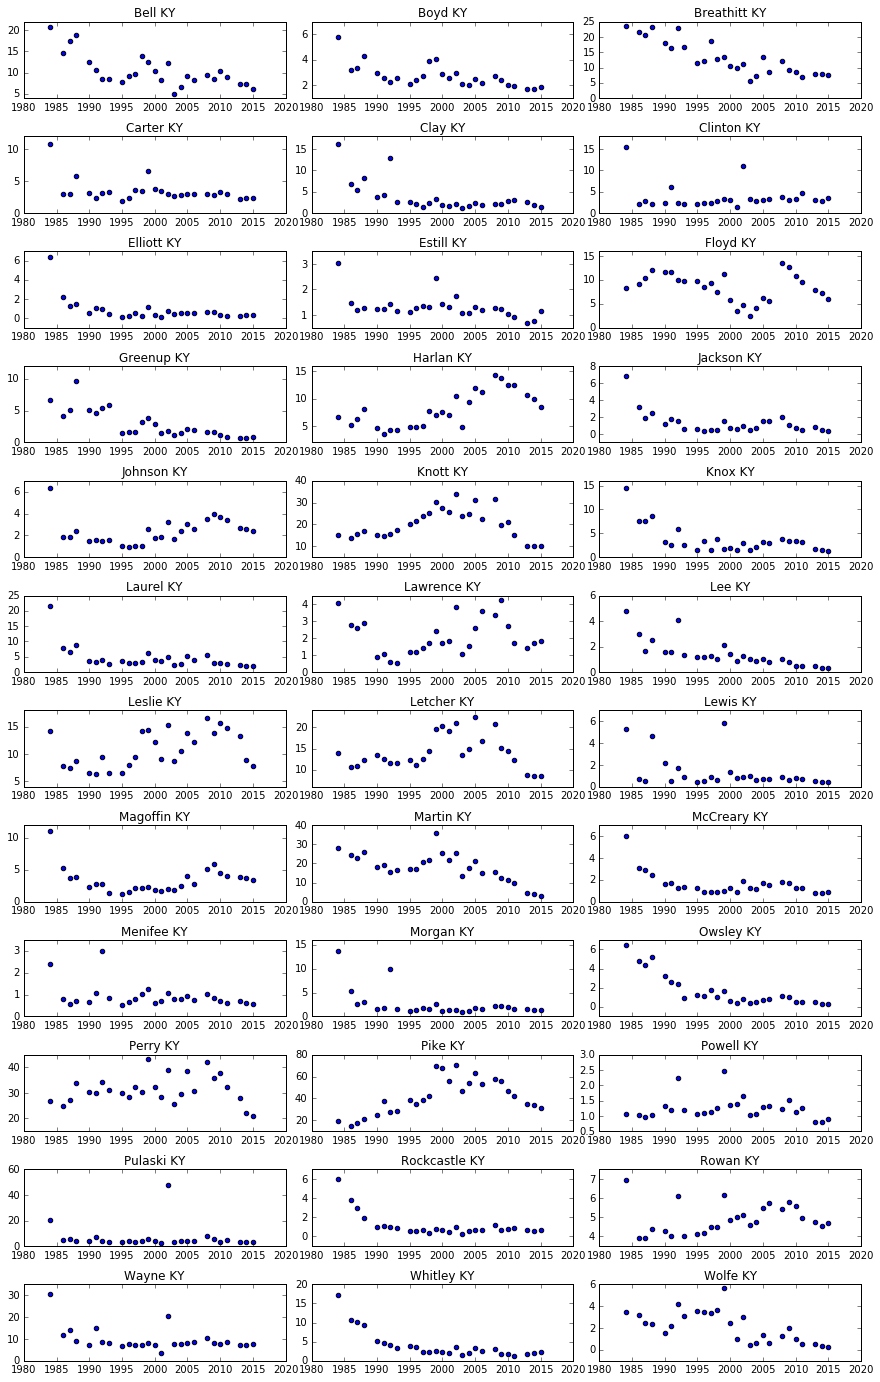

In [87]:
plt.rcParams["figure.figsize"] = [15,24]
fig = plt.figure()

ky = [c['name']+" "+c['state'] for c in c_ordered if c['state'] == 'KY']
gs = gridspec.GridSpec(len(ky)/3, 3 , wspace=0.1, hspace=0.50)

for g,c in zip(gs,ky):
    ax = plt.subplot(g)
    x = [1984]+[i for i in range(1986,1989)] +[i for i in range (1990, 1994)] + [i for i in range(1995,2007)] + [i for i in range(2008,2012)] + \
    [i for i in range(2013,2016)] 
    y = county_areas[c]
    y2 = y[:1]+y[2:5]+y[6:10]+y[11:23]+y[24:28]+y[29:]
    ax.scatter(x,y2)
    ax.set_title(c)
    ax.yaxis.major.locator.set_params(nbins=5)
    ax.yaxis.major.locator.set_params(nbins=5)
plt.show()

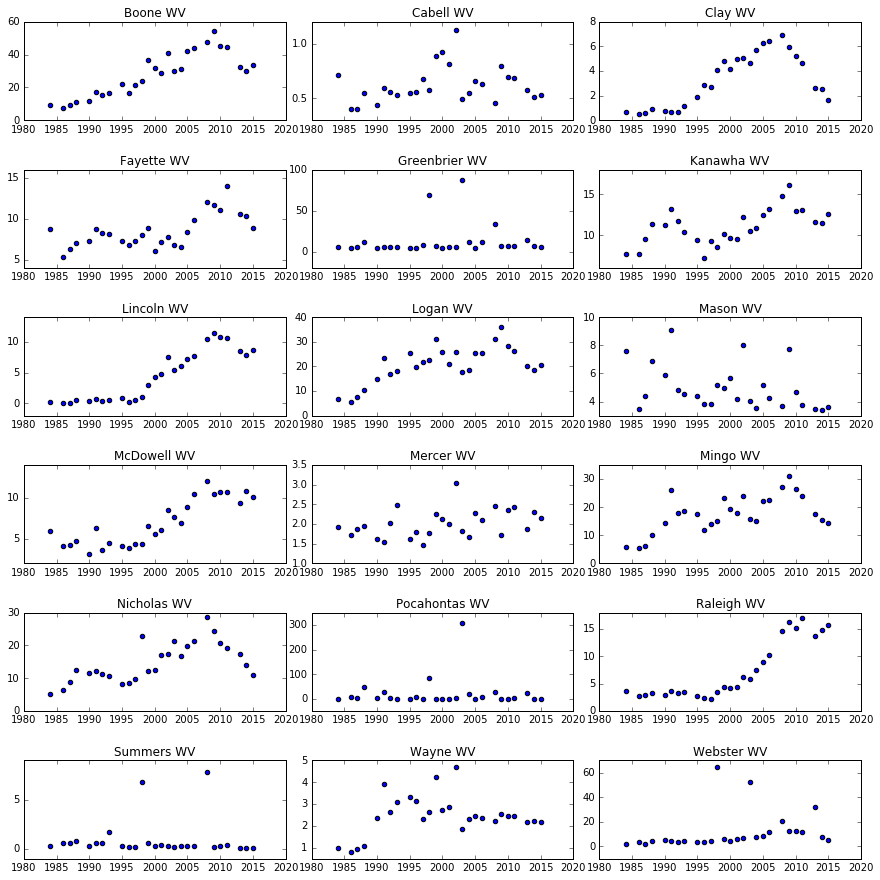

In [89]:
plt.rcParams["figure.figsize"] = [15,15]
fig = plt.figure()

ky = [c['name']+" "+c['state'] for c in c_ordered if c['state'] == 'WV']
gs = gridspec.GridSpec(len(ky)/3, 3 , wspace=0.1, hspace=0.50)

for g,c in zip(gs,ky):
    ax = plt.subplot(g)
    x = [1984]+[i for i in range(1986,1989)] +[i for i in range (1990, 1994)] + [i for i in range(1995,2007)] + [i for i in range(2008,2012)] + \
    [i for i in range(2013,2016)] 
    y = county_areas[c]
    y2 = y[:1]+y[2:5]+y[6:10]+y[11:23]+y[24:28]+y[29:]
    ax.scatter(x,y2)
    ax.set_title(c)
    ax.yaxis.major.locator.set_params(nbins=5)
    ax.yaxis.major.locator.set_params(nbins=5)
plt.show()

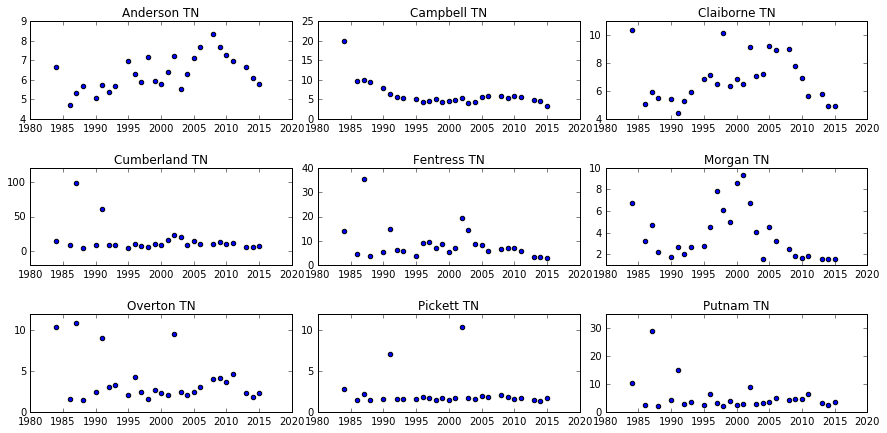

In [90]:
plt.rcParams["figure.figsize"] = [15,7]
fig = plt.figure()

ky = [c['name']+" "+c['state'] for c in c_ordered if c['state'] == 'TN']
gs = gridspec.GridSpec(len(ky)/3, 3 , wspace=0.1, hspace=0.50)

for g,c in zip(gs,ky):
    ax = plt.subplot(g)
    x = [1984]+[i for i in range(1986,1989)] +[i for i in range (1990, 1994)] + [i for i in range(1995,2007)] + [i for i in range(2008,2012)] + \
    [i for i in range(2013,2016)] 
    y = county_areas[c]
    y2 = y[:1]+y[2:5]+y[6:10]+y[11:23]+y[24:28]+y[29:]
    ax.scatter(x,y2)
    ax.set_title(c)
    ax.yaxis.major.locator.set_params(nbins=5)
    ax.yaxis.major.locator.set_params(nbins=5)
plt.show()

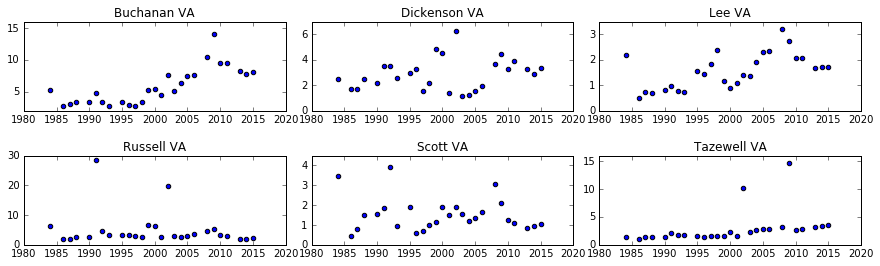

In [91]:
plt.rcParams["figure.figsize"] = [15,4]
fig = plt.figure()

ky = [c['name']+" "+c['state'] for c in c_ordered if c['state'] == 'VA']
gs = gridspec.GridSpec(len(ky)/3, 3 , wspace=0.1, hspace=0.50)

for g,c in zip(gs,ky):
    ax = plt.subplot(g)
    x = [1984]+[i for i in range(1986,1989)] +[i for i in range (1990, 1994)] + [i for i in range(1995,2007)] + [i for i in range(2008,2012)] + \
    [i for i in range(2013,2016)] 
    y = county_areas[c]
    y2 = y[:1]+y[2:5]+y[6:10]+y[11:23]+y[24:28]+y[29:]
    ax.scatter(x,y2)
    ax.set_title(c)
    ax.yaxis.major.locator.set_params(nbins=5)
    ax.yaxis.major.locator.set_params(nbins=5)
plt.show()

In [98]:
import csv
with open('county_areas.csv', 'wb') as output_file:
    writer = csv.writer(output_file)
    writer.writerow(["County","State"]+[i for i in range(1984,2016)])
    for c in c_ordered:
        writer.writerow([c['name'],c['state']]+[a for a in county_areas[c['name']+" "+c['state']]])